# Convolutional neural networks

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# In this tutorial, we will be training a lot of models. In order to use GPU memory cautiously,
# we will set tensorflow option to grow GPU memory allocation when required.
physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [9]:
tf.__version__

'2.12.0'

In [10]:
# Pre-fetch the data when running in sandbox environment
!mkdir -p ~/.keras/datasets
!wget -P ~/.keras/datasets -q https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/data/mnist.npz
# Load tfcv.py module
!wget -O tfcv.py -q https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/computer-vision-tf/tfcv.py

The syntax of the command is incorrect.


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
from tfcv import *
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# Convolutional filters
Bộ lọc tích chập (Convolutional filters) là các cửa sổ nhỏ chạy qua mỗi pixel của hình ảnh và tính trung bình có trọng số của các pixel lân cận.

Chúng được xác định bởi ma trận hệ số trọng số. Hãy xem các ví dụ về việc áp dụng hai bộ lọc tích chập khác nhau lên các chữ số viết tay của bộ dữ liệu MNIST:

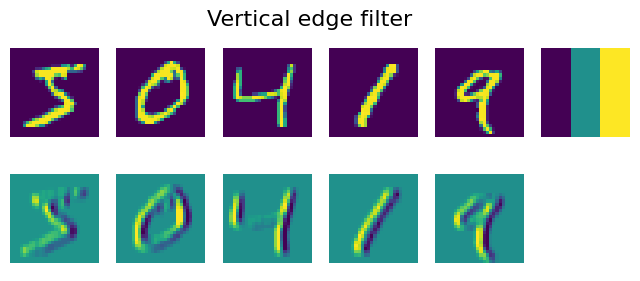

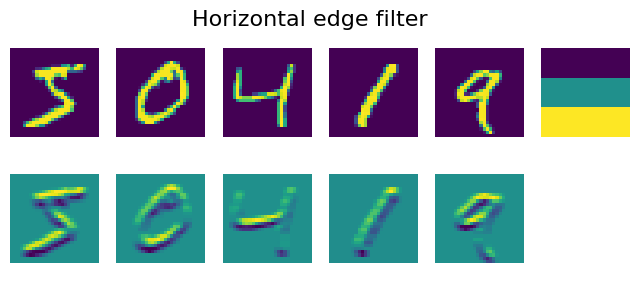

In [2]:
plot_convolution(x_train[:5],[[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]],'Vertical edge filter')
plot_convolution(x_train[:5],[[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]],'Horizontal edge filter')

Bộ lọc đầu tiên được gọi là bộ lọc cạnh dọc (vertical edge filter), và nó được xác định bởi ma trận sau:

-1 -1 -1
 0  0  0
 1  1  1
 
Khi bộ lọc này chạy qua một trường pixel tương đối đồng nhất, tất cả các giá trị cộng lại thành 0. Khi nó gặp một cạnh dọc trong hình ảnh, giá trị cao đột ngột được tạo ra. Đó là lý do tại sao trong các hình ảnh trên, bạn có thể thấy các cạnh dọc được biểu diễn bằng các giá trị cao và thấp, trong khi các cạnh ngang được lấy trung bình.

Một điều ngược lại xảy ra khi chúng ta áp dụng bộ lọc cạnh ngang (horizontal edge filter) - các đường ngang được tăng cường, và các đường dọc được lấy trung bình.

Trong thị giác máy tính cổ điển, nhiều bộ lọc được áp dụng vào hình ảnh để tạo ra các đặc trưng, sau đó được sử dụng bởi thuật toán học máy để xây dựng một bộ phân loại. Trong học sâu, chúng ta xây dựng các mạng nơ-ron để học các bộ lọc tích chập tốt nhất để giải quyết bài toán phân loại một cách tự động.

Để làm điều đó, chúng ta giới thiệu các lớp tích chập (convolutional layers).

# Convolutional layers
Các lớp tích chập được xác định bằng cách sử dụng lớp Conv2d. Chúng ta cần chỉ định các thông số sau:

filters: số lượng bộ lọc được sử dụng. Trong ví dụ này, chúng ta sẽ sử dụng 9 bộ lọc khác nhau, cho phép mạng nơ-ron có nhiều cơ hội để khám phá xem bộ lọc nào hoạt động tốt nhất cho tình huống của chúng ta.
kernel_size: kích thước của cửa sổ trượt. Thông thường, chúng ta sử dụng các bộ lọc 3x3 hoặc 5x5.
Một CNN đơn giản sẽ chỉ chứa một lớp tích chập. Với kích thước đầu vào là 28x28, sau khi áp dụng chín bộ lọc 5x5, chúng ta sẽ thu được một tensor có kích thước 24x24x9. Kích thước không gian nhỏ hơn, vì chỉ có 24 vị trí mà một khoảng trượt có kích thước 5 có thể vừa vặn trong 28 pixel.

Sau lớp tích chập, chúng ta làm phẳng (flatten) tensor 24x24x9 thành một vector có kích thước 5184. Sau đó, thêm lớp tuyến tính (linear layer) để tạo ra 10 lớp và sử dụng hàm kích hoạt relu giữa các lớp.

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=9, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 9)         234       
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 10)                51850     
                                                                 
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
_________________________________________________________________


In [4]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2219 - acc: 0.9362 - val_loss: 0.0965 - val_acc: 0.9728
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - acc: 0.9747 - val_loss: 0.0704 - val_acc: 0.9775
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0689 - acc: 0.9803 - val_loss: 0.0638 - val_acc: 0.9781


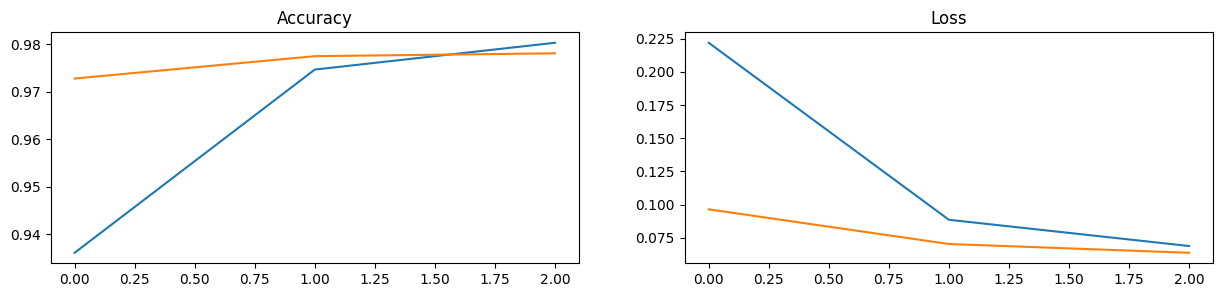

In [6]:
plot_results(hist)

# Visualizing Convolutional Layers

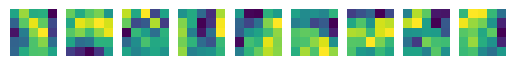

In [7]:
fig,ax = plt.subplots(1,9)
l = model.layers[0].weights[0]
for i in range(9):
    ax[i].imshow(l[...,0,i])
    ax[i].axis('off')

Đầu tiên, các lớp tích chập tìm kiếm các mẫu nguyên thủy, chẳng hạn như các đường ngang hoặc đứng. Chúng ta có thể áp dụng các lớp tích chập tiếp theo trên cơ sở của chúng để tìm kiếm các mẫu cấp cao hơn, chẳng hạn như các hình dạng cơ bản. Sau đó, các lớp tích chập khác có thể kết hợp những hình dạng đó thành một số phần của hình ảnh, lên tới đối tượng cuối cùng mà chúng ta đang cố gắng phân loại.

Khi làm điều đó, chúng ta cũng có thể áp dụng một mẹo: giảm kích thước không gian của hình ảnh. Khi chúng ta đã phát hiện ra có một đường nằm ngang trong cửa sổ trượt 3x3, thì không quan trọng lắm rằng nó xảy ra chính xác tại điểm ảnh nào. Do đó, chúng ta có thể "giảm kích thước" của hình ảnh, điều này được thực hiện bằng cách sử dụng một trong các lớp gộp (pooling layers):

Gộp trung bình (Average Pooling): Lấy một cửa sổ trượt (ví dụ: 2x2 điểm ảnh) và tính trung bình các giá trị trong cửa sổ.
Gộp tối đa (Max Pooling): Thay cửa sổ bằng giá trị tối đa. Ý tưởng đằng sau gộp tối đa là phát hiện sự hiện diện của một mẫu cụ thể trong cửa sổ trượt.
Do đó, trong một CNN điển hình, sẽ có nhiều lớp tích chập, với các lớp gộp ở giữa để giảm kích thước của hình ảnh. Chúng ta cũng sẽ tăng số bộ lọc, vì khi các mẫu trở nên phức tạp hơn - có nhiều kết hợp thú vị khả thi mà chúng ta cần tìm kiếm.

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(),    
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [9]:
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2063 - acc: 0.9397 - val_loss: 0.0681 - val_acc: 0.9788
Epoch 2/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0718 - acc: 0.9787 - val_loss: 0.0480 - val_acc: 0.9839
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0539 - acc: 0.9835 - val_loss: 0.0381 - val_acc: 0.9872


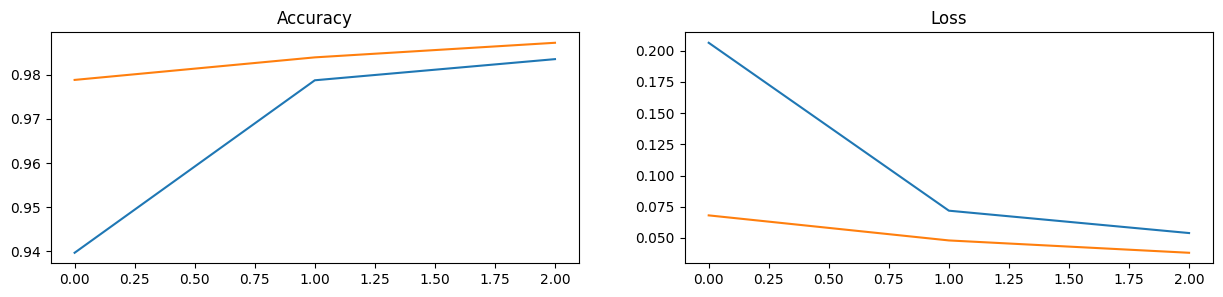

In [10]:
plot_results(hist)

# Playing with real images from the CIFAR-10 dataset

In [11]:
# Pre-fetch CIFAR-10 dataset when running in sandbox
!wget -P ~/.keras/datasets -q https://mslearntensorflowlp.blob.core.windows.net/data/cifar-10-batches-py.tar.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170498071/170498071 [==============================] - 231s 1us/step


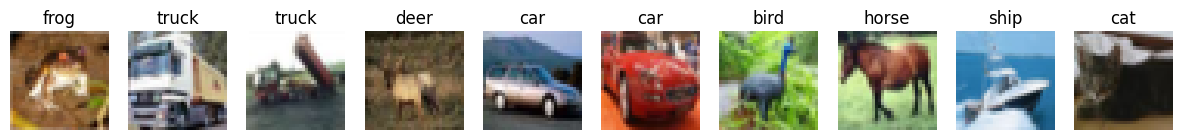

In [13]:
display_dataset(x_train, y_train, classes=classes)

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(84, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.6379 - acc: 0.4011 - val_loss: 1.3913 - val_acc: 0.4968
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3479 - acc: 0.5205 - val_loss: 1.2976 - val_acc: 0.5308
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2362 - acc: 0.5627 - val_loss: 1.1875 - val_acc: 0.5796
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1575 - acc: 0.5902 - val_loss: 1.1989 - val_acc: 0.5704
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1002 - acc: 0.6129 - val_loss: 1.1822 - val_acc: 0.5804
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0425 - acc: 0.6318 - val_loss: 1.1010 - val_acc: 0.6125
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0015 - acc: 0.6468 - val_loss: 1.1035 - val_acc: 0.6175
Epoch 8/10
1563/1563 [==========================

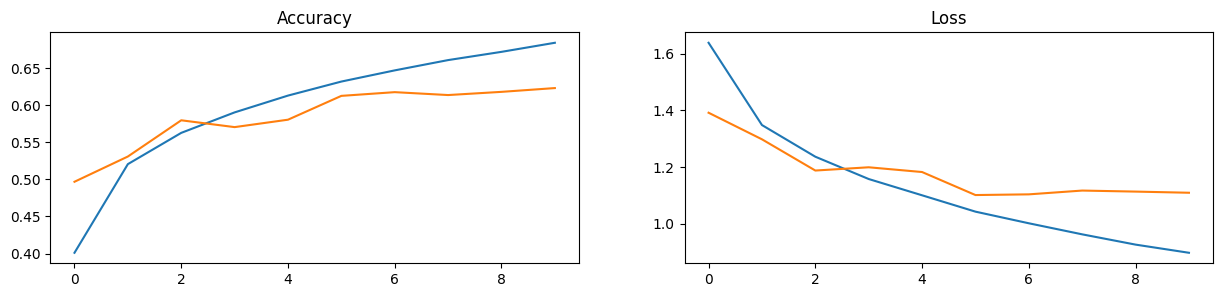

In [17]:
plot_results(hist)